In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np
import pytz
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
plt.style.use('_mpl-gallery')

In [2]:
# Orange Group

orgParticipants = [24,25,27,28] 
startCoordination = datetime.datetime(2023,10,12,0,0,0,0,tzinfo=pytz.timezone('UTC'))

# Define the time range for nighttime shading - 7pm to 5am
nighttime_start = 19
nighttime_end = 5

bookings = pd.read_json("../../chatbot_data/bookings/bookings3-11-23.json")

bookings = pd.DataFrame(bookings.fields.values.tolist())

bookings['start'] = pd.to_datetime(bookings['start'], format='ISO8601')
bookings['created_at'] = pd.to_datetime(bookings['created_at'], format='ISO8601')
bookings['modified_at'] = pd.to_datetime(bookings['modified_at'], format='ISO8601')

orgBookings = bookings.loc[bookings['user'].isin(orgParticipants)] 
orgBookings = orgBookings.loc[orgBookings['start']>= startCoordination ] 
orgBookings

,start,duration_seconds,type,description,flexibility,consumption,sensor,measurement,user,modified_at,created_at
89,2023-10-12 11:00:00+00:00,1800,housework,None,yes,0.077454,34,electricity_consumption,25,2023-10-12 10:11:23.999000+00:00,2023-10-12 10:11:23.999000+00:00
90,2023-10-12 11:00:00+00:00,3600,lunch,None,yes,0.074525,34,electricity_consumption,25,2023-10-12 10:13:01.585000+00:00,2023-10-12 10:13:01.585000+00:00
91,2023-10-12 12:00:00+00:00,2700,showering,None,yes,0.149816,34,electricity_consumption,25,2023-10-12 10:15:06.741000+00:00,2023-10-12 10:15:06.741000+00:00
92,2023-10-12 11:00:00+00:00,1800,hob,None,yes,0.232136,28,electricity_consumption,24,2023-10-12 10:59:30.020000+00:00,2023-10-12 10:59:30.020000+00:00
93,2023-10-12 14:00:00+00:00,1800,laundry,None,yes,0.014146,35,electricity_consumption,28,2023-10-12 13:46:01.423000+00:00,2023-10-12 13:46:01.423000+00:00
...,...,...,...,...,...,...,...,...,...,...,...
213,2023-11-01 12:00:00+00:00,1800,hob,,yes,0.230000,28,electricity_consumption,24,2023-11-01 09:04:49.527000+00:00,2023-11-01 09:04:49.527000+00:00
214,2023-11-01 10:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:05:28.524000+00:00,2023-11-01 09:05:28.524000+00:00
215,2023-11-01 10:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:05:57.216000+00:00,2023-11-01 09:05:57.216000+00:00
216,2023-11-01 11:00:00+00:00,3600,computer,,yes,0.100000,28,electricity_consumption,24,2023-11-01 09:06:34.641000+00:00,2023-11-01 09:06:34.641000+00:00


In [4]:
# g1_group_consumption = pd.read_json("../../chatbot_data/consumption/group_one/all_group.json")
consumption111Camilla = pd.read_json("../../chatbot_data/consumption/group_orange/sensor_111_camilla.json")
consumption106Laura = pd.read_json("../../chatbot_data/consumption/group_orange/sensor_106_laura.json")
consumption114Hayley = pd.read_json("../../chatbot_data/consumption/group_orange/sensor_114_hayley.json")
consumption117Tony = pd.read_json("../../chatbot_data/consumption/group_orange/sensor_117_tony.json")

# g1_group_consumption = g1_group_consumption["readings"][0]
consumption111Camilla = consumption111Camilla["readings"][0]
consumption106Laura = consumption106Laura["readings"][0]
consumption114Hayley = consumption114Hayley["readings"][0]
consumption117Tony = consumption117Tony["readings"][0]

# g1_group_consumption = pd.DataFrame.from_dict(g1_group_consumption, orient='columns')
consumption111Camilla = pd.DataFrame.from_dict(consumption111Camilla, orient='columns')
consumption106Laura = pd.DataFrame.from_dict(consumption106Laura, orient='columns')
consumption114Hayley = pd.DataFrame.from_dict(consumption114Hayley, orient='columns')
consumption117Tony = pd.DataFrame.from_dict(consumption117Tony, orient='columns')

# g1_group_consumption['time'] = pd.to_datetime(g1_group_consumption['time'],infer_datetime_format=True)
consumption111Camilla['time'] = pd.to_datetime(consumption111Camilla['time'], format='ISO8601')
consumption106Laura['time'] = pd.to_datetime(consumption106Laura['time'], format='ISO8601')
consumption114Hayley['time'] = pd.to_datetime(consumption114Hayley['time'], format='ISO8601')
consumption117Tony['time'] = pd.to_datetime(consumption117Tony['time'], format='ISO8601')

# g1_group_consumption['value'] = g1_group_consumption['value']*0.23*0.64*0.9
consumption111Camilla['value'] = consumption111Camilla['value']*0.23*0.64*0.9
consumption106Laura['value'] = consumption106Laura['value']*0.23*0.64*0.9
consumption114Hayley['value'] = consumption114Hayley['value']*0.23*0.64*0.9
consumption117Tony['value'] = consumption117Tony['value']*0.23*0.64*0.9

# g1_group_consumption_coordination = g1_group_consumption[ g1_group_consumption['time'] > startCoordination ]
consumption111Camilla_coordination = consumption111Camilla[ consumption111Camilla['time'] > startCoordination ]
consumption106Laura_coordination = consumption106Laura[ consumption106Laura['time'] > startCoordination ]
consumption114Hayley_coordination = consumption114Hayley[ consumption114Hayley['time'] > startCoordination ]
consumption117Tony_coordination = consumption117Tony[ consumption117Tony['time'] > startCoordination ]


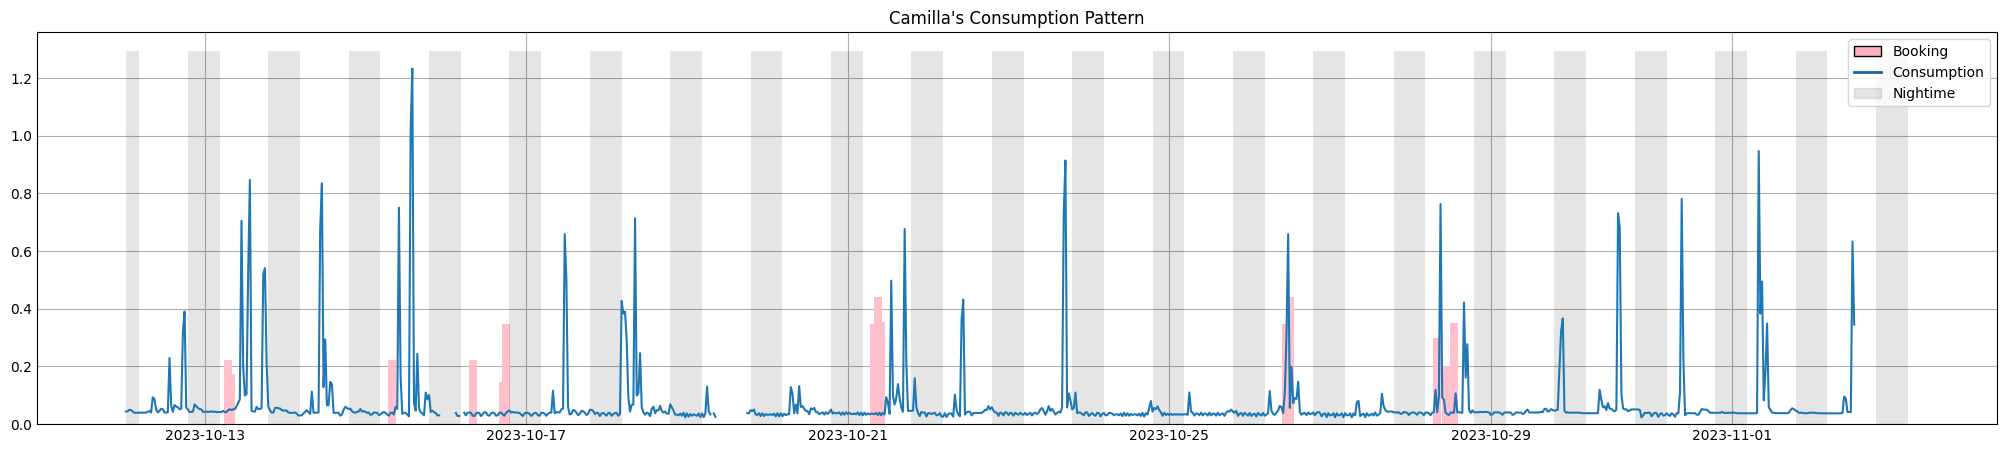

In [5]:
bookings111Camilla = orgBookings.loc[orgBookings['user']==27]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings111Camilla['start'],bookings111Camilla['consumption'],color='pink',width=0.1)
ax.plot(consumption111Camilla_coordination['time'],consumption111Camilla_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption111Camilla_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption111Camilla_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption111Camilla_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Camilla's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('camilla_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

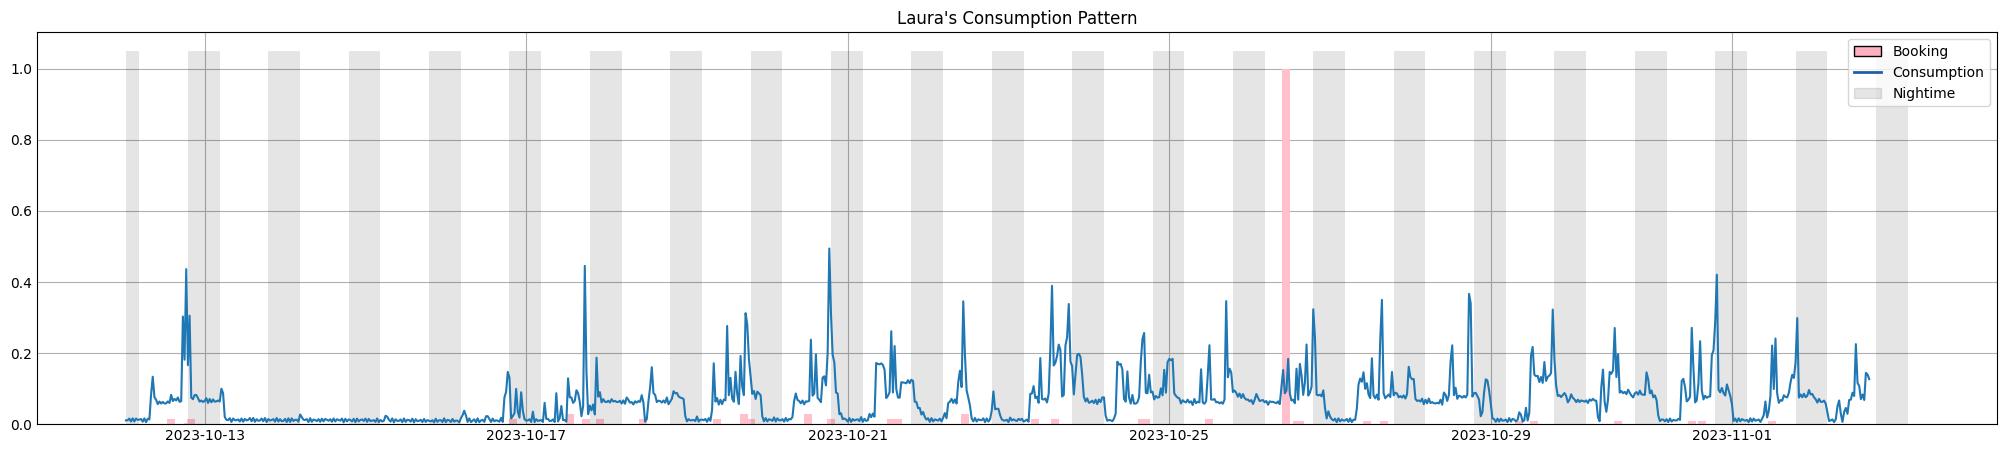

In [6]:
bookings106Laura = orgBookings.loc[orgBookings['user']==28]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings106Laura['start'],bookings106Laura['consumption'],color='pink',width=0.1)
ax.plot(consumption106Laura_coordination['time'],consumption106Laura_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption106Laura_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption106Laura_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption106Laura_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Laura's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('laura_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

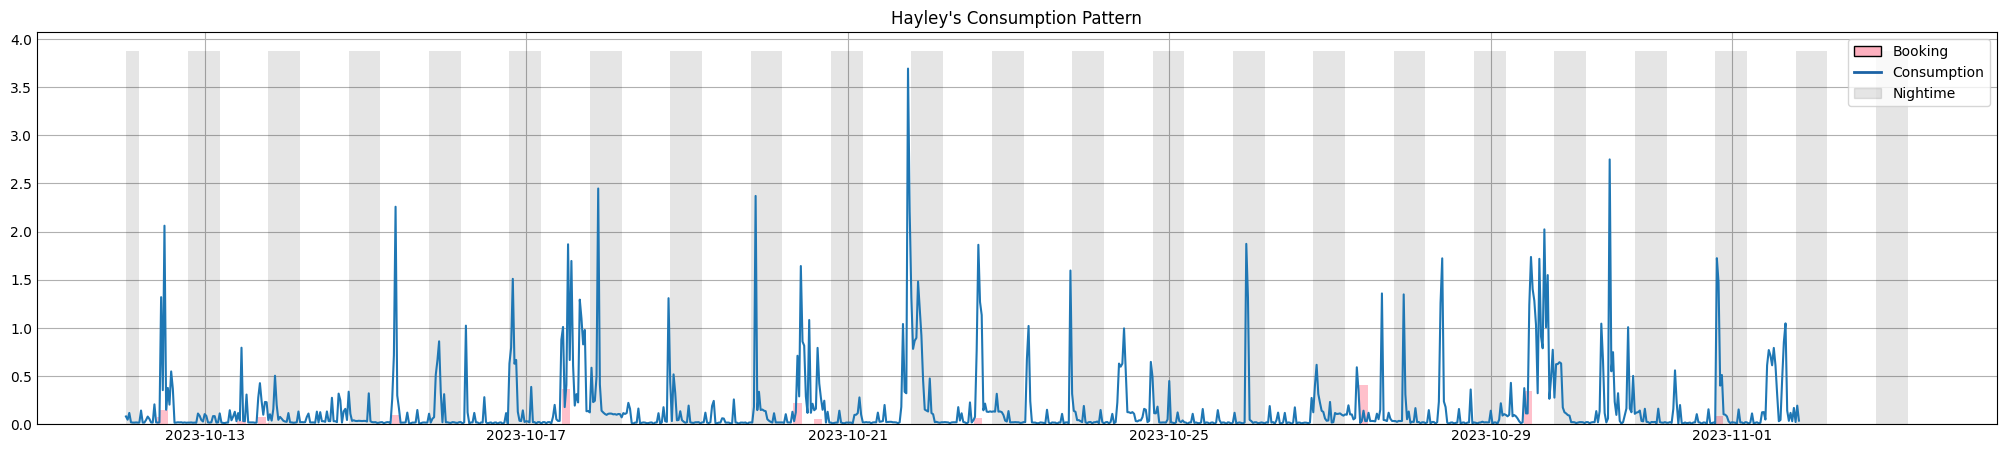

In [7]:
bookings114Hayley = orgBookings.loc[orgBookings['user']==25]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings114Hayley['start'],bookings114Hayley['consumption'],color='pink',width=0.1)
ax.plot(consumption114Hayley_coordination['time'],consumption114Hayley_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption114Hayley_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption114Hayley_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption114Hayley_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Hayley's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('hayley_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

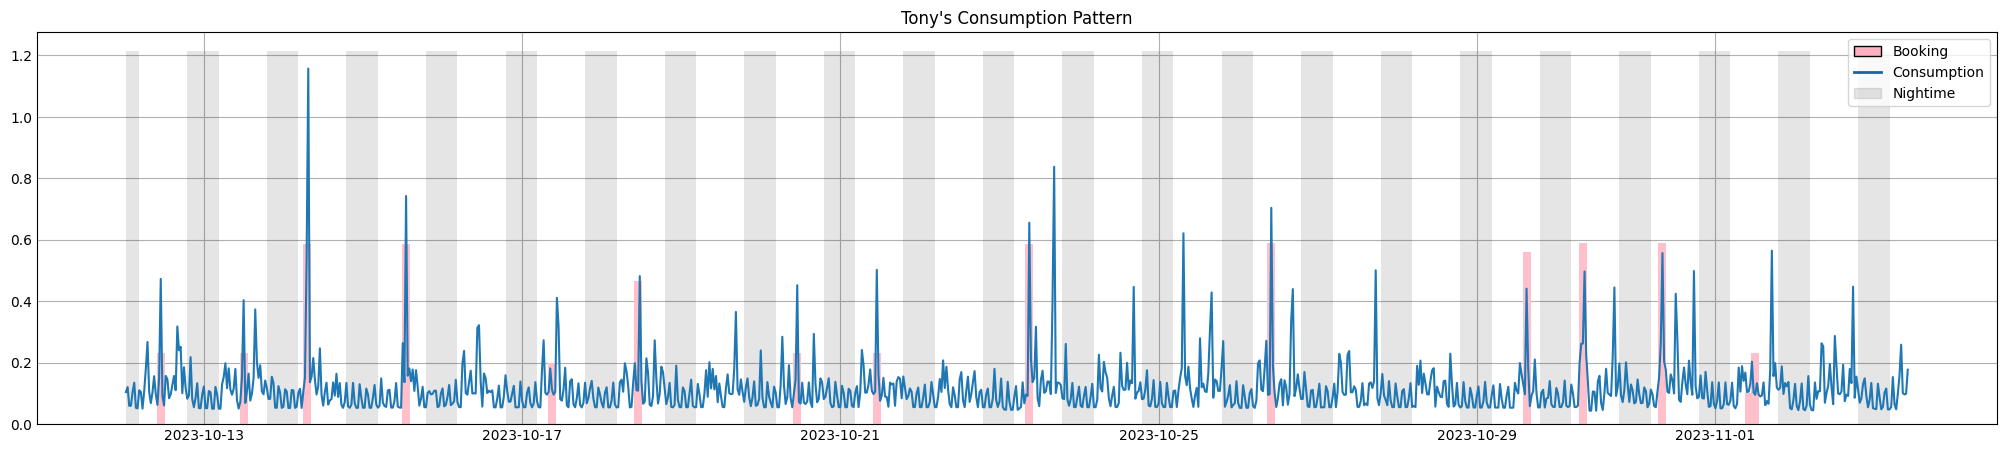

In [8]:
bookings117Tony = orgBookings.loc[orgBookings['user']==24]

fig1, ax = plt.subplots( figsize=(20, 4))
ax.bar(bookings117Tony['start'],bookings117Tony['consumption'],color='pink',width=0.1)
ax.plot(consumption117Tony_coordination['time'],consumption117Tony_coordination['value'])

# Fill the background to represent nighttime
ax.fill_between(consumption117Tony_coordination['time'], ax.get_ylim()[0],
                ax.get_ylim()[1],
                where=((consumption117Tony_coordination['time'].dt.hour >= nighttime_start) |
                       (consumption117Tony_coordination['time'].dt.hour < nighttime_end)),
                facecolor="#000000", alpha=0.1)

ax.set_title("Tony's Consumption Pattern")
handles = [Rectangle((0, 0), 1, 1, color="#fdb0bf", ec="k"),
           Line2D([0, 1], [0.5, 0.5], color="#1b62a5", lw=2),
           Rectangle((0, 0), 1, 1, color="#000000", ec="k", alpha=0.1)]
labels = ["Booking", "Consumption", "Nightime"]
plt.legend(handles, labels)

plt.savefig('tony_consumption.png', dpi=300, bbox_inches='tight')
plt.show()